# Multivariable linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/JBVNL/Desktop/CarPrice_Assignment.csv')

## Data

In [3]:
data.head(100)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1,nissan juke,gas,std,two,hatchback,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7799.0
96,97,1,nissan latio,gas,std,four,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7499.0
97,98,1,nissan note,gas,std,four,wagon,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7999.0
98,99,2,nissan clipper,gas,std,two,hardtop,fwd,front,95.1,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,8249.0


In [4]:
x1 = data['carlength']
x2 = data['carwidth']
x3 = data[ 'carheight']
x4 = data[ 'enginesize']
x5 = data[ 'stroke']
x6 = data[ 'horsepower']
y = data['price']
m = len(data)
s = int(0.8*m)

## Gradient function

In [5]:
def grad1(w1 ,w2, w3, w4 , w5 ,w6 , w ):
    c = 0.0
    for i in range (1 , s):
        c += (w1*x1[i] + w2*x2[i] + w3*x3[i] + w4*x4[i] + w5*x5[i] + w6*x6[i] + w - y[i] )*x1[i]
    return c/s
def grad2(w1 ,w2, w3, w4 , w5 ,w6 , w ):
    c = 0.0
    for i in range (1 , s):
        c += (w1*x1[i] + w2*x2[i] + w3*x3[i] + w4*x4[i] + w5*x5[i] + w6*x6[i] + w - y[i])*x2[i]
    return c/s
def grad3(w1 ,w2, w3, w4 , w5 ,w6 , w ):
    c = 0.0
    for i in range (1 , s):
        c += (w1*x1[i] + w2*x2[i] + w3*x3[i] + w4*x4[i] + w5*x5[i] + w6*x6[i] + w - y[i])*x3[i]
    return c/s
def grad4(w1 ,w2, w3, w4 , w5 ,w6 ,w ):
    c = 0.0
    for i in range (1 , s):
        c += (w1*x1[i] + w2*x2[i] + w3*x3[i] + w4*x4[i] + w5*x5[i] + w6*x6[i] + w - y[i])*x4[i]
    return c/s
def grad5(w1 ,w2, w3, w4 , w5 ,w6 ,w ):
    c = 0.0
    for i in range (1 , s):
        c += (w1*x1[i] + w2*x2[i] + w3*x3[i] + w4*x4[i] + w5*x5[i] + w6*x6[i] + w - y[i])*x5[i]
    return c/s
def grad6(w1 ,w2, w3, w4 , w5 ,w6 ,w ):
    c = 0.0
    for i in range (1 , s):
        c += (w1*x1[i] + w2*x2[i] + w3*x3[i] + w4*x4[i] + w5*x5[i] + w6*x6[i] + w - y[i])*x6[i]
    return c/s
def grad7(w1 ,w2, w3, w4 , w5 ,w6,w ):
    c = 0.0
    for i in range (1 , s):
        c += (w1*x1[i] + w2*x2[i] + w3*x3[i] + w4*x4[i] + w5*x5[i] + w6*x6[i] + w - y[i])
    return c/s

## Cost function

In [6]:
def cost_fun(w1, w2, w3, w4, w5, w6, w):
    k = 0.0
    for i in range (1, int(0.8*s)):
        k += (w1*x1[i] + w2*x2[i] + w3*x3[i] + w4*x4[i] + w5*x5[i] + w6*x6[i] + w - y[i])**2
    return k/2*(int(0.8*s))    

Text(0, 0.5, 'Cost function')

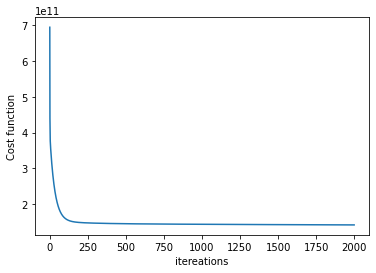

In [7]:
x = 0.00001
w1 = f1 = 0.0
w2 = f2 = 0.0
w3 = f3 = 0.0
w4 = f4 = 0.0
w5 = f5 = 0.0
w6 = f6 = 0.0
w = f = 0.0
matx = []
maty = []

for i in range (1, 2000):
    f1 +=  - x*grad1(w1, w2, w3, w4, w5, w6, w)
    f2 +=  - x*grad2(w1, w2, w3, w4, w5, w6, w)
    f3 +=  - x*grad3(w1, w2, w3, w4, w5, w6, w)
    f4 +=  - x*grad4(w1, w2, w3, w4, w5, w6, w)
    f5 +=  - x*grad5(w1, w2, w3, w4, w5, w6, w)
    f6 +=  - x*grad6(w1, w2, w3, w4, w5, w6, w)
    f += - x*grad7(w1, w2, w3, w4, w5, w6, w)
    w1 = f1 
    w2 =f2
    w3 = f3
    w4 = f4
    w5 = f5 
    w6 = f6 
    w = f
    c = cost_fun(w1 , w2 , w3 , w4 , w5 , w6 , w)
    maty.append(c)
    matx.append(i)
plt.plot(matx , maty)
plt.xlabel("itereations")
plt.ylabel("Cost function")
  

## Testing

In [8]:
for i in range (165, 205):
    est = w1*x1[i] + w2*x2[i] + w3*x3[i] + w4*x4[i] + w5*x5[i] + w6*x6[i] + w
    print("Actual price is ", y[i], " and  estimated price is ", est)
    print("Error is ", abs(est - y[i])*(100/y[i]), "%")
    print()


Actual price is  9298.0  and  estimated price is  10650.651460639165
Error is  14.54776791395101 %

Actual price is  9538.0  and  estimated price is  10650.651460639165
Error is  11.66545880309462 %

Actual price is  8449.0  and  estimated price is  16745.879156347914
Error is  98.19954025740222 %

Actual price is  9639.0  and  estimated price is  16745.879156347914
Error is  73.73046121327849 %

Actual price is  9989.0  and  estimated price is  16745.879156347914
Error is  67.64319908246985 %

Actual price is  11199.0  and  estimated price is  16745.879156347914
Error is  49.53012908606049 %

Actual price is  11549.0  and  estimated price is  16745.879156347914
Error is  44.99852070610368 %

Actual price is  17669.0  and  estimated price is  16700.761279018137
Error is  5.479872777077722 %

Actual price is  8948.0  and  estimated price is  12059.717279632401
Error is  34.775561909168545 %

Actual price is  10698.0  and  estimated price is  9376.649589991783
Error is  12.35137792118355

## Word problem

In [9]:
carlength =190.9
carwidth = 70.3
carheight = 54.9
enginesize = 183
stroke = 3.64
horsepower = 123
estimated_price = w1*carlength + w2*carwidth + w3*carheight + w4*enginesize + w5*stroke + w6*horsepower + w 
print(estimated_price)

21204.96785655013
